# Project: Classification - Hotel Booking Cancellation Prediction

## Marks: 30

Welcome to the project on classification. We will use the INN Hotels dataset for this problem.

## Context

A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers' booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.

## Objective

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.


## Data Description

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and overview of the dataset

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

#Algorithms to use
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#To tune the model
from sklearn.model_selection import GridSearchCV

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

#### Loading data

In [2]:
hotel = pd.read_csv("INNHotelsGroup.csv")

In [3]:
# copying data to another variable to avoid any changes to original data
data = hotel.copy()

#### View the first and last 5 rows of the dataset

In [4]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


#### Check the info of the data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

* The dataset has **36,275 rows and 19 columns**. 

* `Booking_ID`, `type_of_meal_plan`, `room_type_reserved`, `market_segment_type`, and `booking_status` are of **object type** while rest columns are numeric in nature.

* There are **no null values** in the dataset.

* **Booking_ID column is an identifier**. Let's check if each entry of the column is unique.

In [7]:
data.Booking_ID.nunique()

36275

**Observations:**
- We can see that **all the entries of this column are unique**. Hence, this column would not add any value to our analysis. 
- Let's drop this column.

#### Dropping the Booking_ID column

In [8]:
data = data.drop(["Booking_ID"], axis=1)

In [9]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## Exploratory Data Analysis

#### Summary Statistics for numerical columns

#### Question 1: Write the observations from the below summary statistics (2 Marks)

In [10]:
#Selecting numerical columns and checking summary statistics
num_cols = data.select_dtypes('number').columns

data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


**Observations:**
- all numerical columns have a value count of 36275.

**no_of_adults** 
 - average number of adults is ~1.85 per booking. Over 75% of the bookings contain two adults or under. With a max of 4 adults.
 - looks like mostly there are atleast 2 adults, makes sense, either a couple or mom and dad with their kids. Some times a single adult can also get a room, e.g individual going on a business trip and spends the night.
 
**arrival_year**
 - from the arrival year we can see all the bookings consists of data between 2017 and 2018. So this spans 2 years.

**no_of_children**
- On average there is under 1 child per booking. Mean is ~0.11. The std is greater than the mean which indicates variation and spread out data. Max is 10. So seems like there are extreme outliers.

**no_of_weekend_nights**
- Mean ~0.81. Once again Std is higher than the mean so there is slight dispersion of data. Few outliers. There is a min of 0. So obviously some people make booking on weekdays rather than holidays. 75% of the data is under 2 weekend nights (Sat or Sun). There is a max of 7.

**required_car_parking_space**
- Mean of 0.03. Max is only 1 required car space. Over 75% of the data is 0. So most people who book a hotel room comeby other methods of transportation. They are probably tourists, as tourists usually don't travel with a car.

**lead_time**
- mean of ~85.2. Std of 85.9. In average customers book 85 days in advance before their arrival time. Over 75% of booking are made upo 126 days in advance with a max of 443. Obviously people planning holidays want to get everything planned beforehand so they can get time off work, etc.

**arrival_month**
- Mean of ~7.4 (July). Obviously min is 1 (Jan) and max is (Dec). Looks like in average people make bookings during July. Which is mid summer! Portugal is beautiful during the summer :)

**arrival_date**
- Mean of ~16. So in average people arive on the 16th of the month. Min is obviously the 1st. And max (depending on how many days in a month) is upto 31 days. Only 25% of booking are made in the last week of the month (23st-31st)

**repeated_guest (yes or n0)**
- 1 is yes. 0 is No
- Mean of ~0.02. So basically 0. We can see atleast 75% of bookings are made by new customers!

**no_of_previous_cancellations**
- mean of ~0.02. Max is upto 13. 75% of the data show 0 previous bookings were canceled by the customer prior to the current booking. This makes sense cuz most of the customers are new anyways. Std is greater than mean so there is lots of variation/outliers. We have a max of 13. These are likely returning customers who have cancelled in the past.

**no_of_previous_bookings_not_canceled**
- Mean of ~ 0.15. Std ~1.75. Once again a lot of variance and spread/outliers on this feature. We also see a max of 58. Over 75% of data shows if a returning customer was booking again, most of there previous bookings were never canceled. So they always show up. While there is a case where a customer cancelled 58x prior to current booking.

**avg_price_per_room**
- mean of ~103.4. Standard deviation of 35. This is because the prices are dynamic and change throughout the time of day. We see there is a min of 0. So these rooms are complimentary services or if someone had a bad experience they give a room free of charge. The max is 540 euros. They are VIP suites, mountain-side/ocean-side view, more bedrooms ,etc. 

**no_of_special_requests**
- mean of ~0.62. Ranges from 0-5. Over 75% of the data is either 1 special request or under. So people tend to not make special requests usually. Maybe cuz they can see most of the features of the room online already before arriving/booking.



In [11]:
#Checking the rows where avg_price_per_room is 0
data[data["avg_price_per_room"] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.0,1,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.0,1,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.0,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.0,1,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.0,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.0,1,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.0,1,Not_Canceled
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.0,0,Not_Canceled
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.0,2,Not_Canceled


- In the market segment column, it looks like **many values are complementary**. Let's check the market segment where the room prices are equal to 0.

In [12]:
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

* It makes sense that most values with room prices equal to 0 are the rooms given as complimentary service given by the hotel.
* The rooms booked online might be a part of some promotional campaign done by the hotel. We will not treat these rows as we don't have the data to test this claim.

#### Check the distribution and outliers for some columns in the data

lead_time
Skew : 1.29


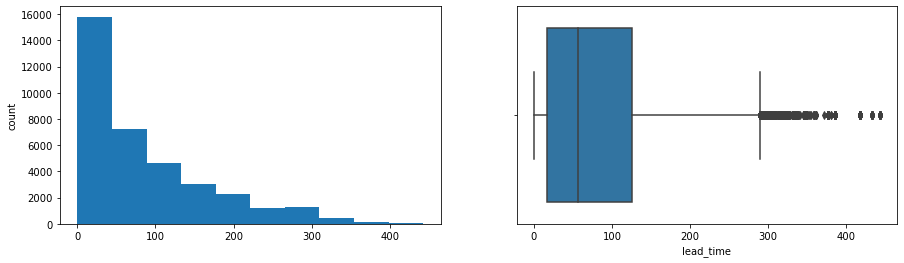

no_of_previous_cancellations
Skew : 25.2


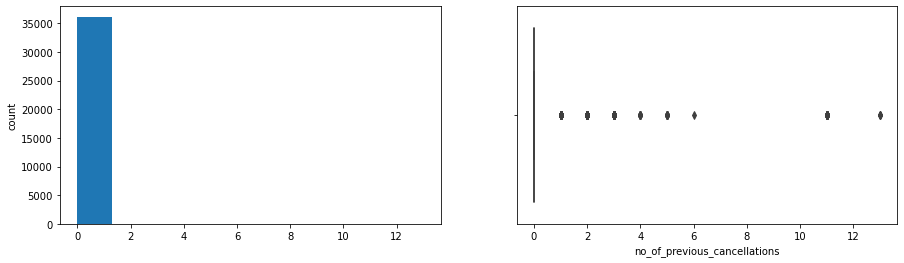

no_of_previous_bookings_not_canceled
Skew : 19.25


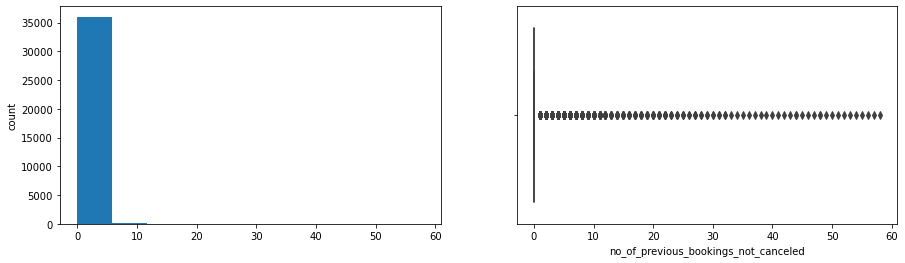

avg_price_per_room
Skew : 0.67


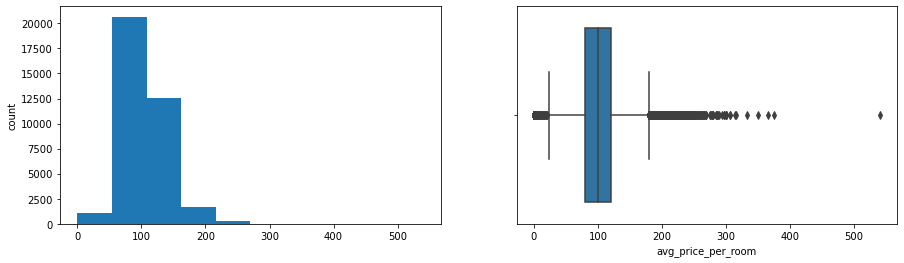

In [13]:
for col in ['lead_time', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room']:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

- The distribution of **lead time is right-skewed**. Many customers have made the booking on the same day of arrival as well. There are many outliers, **some customers made booking more than 400 days in advance**. 
- **Very few customers have more than one cancellation**. Some customers canceled more than 12 times.
- **Very few customers have more than 1 booking not canceled previously**. Some customers have not canceled their bookings around 60 times.
- **The distribution of average price per room is skewed to right**. There are outliers on both sides. The median price of a room is around ~100 euros. There is 1 observation where the average price of the room is more than 500 euros. This observation is quite far away from the rest of the values. We can treat this by clipping the value to the upper whisker (Q3 + 1.5 * IQR).

In [14]:
# Calculating the 25th quantile
Q1 = data["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = data["avg_price_per_room"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

In [15]:
# assigning the outliers the value of upper whisker
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

#### Now, let's check percentage of each category for some variables

#### Question 2: 

- **Write the code to check the percentage of each category for columns mentioned below (cat_cols) (2 Marks)**
- **Write your observations (2 Marks)**

In [17]:
cat_cols = ['no_of_adults', 'no_of_children', 'no_of_week_nights', 'no_of_weekend_nights', 'required_car_parking_space', 
        'type_of_meal_plan', 'room_type_reserved', 'arrival_month', 'market_segment_type', 'no_of_special_requests', 
        'booking_status']

for i in cat_cols:
    print(data[i].value_counts(normalize=True)*100)  #normalize = true, give thes percentage of each column
    print('*'*50)

2    71.972433
1    21.212957
3     6.387319
0     0.383184
4     0.044108
Name: no_of_adults, dtype: float64
**************************************************
0     92.562371
1      4.460372
2      2.916609
3      0.052378
9      0.005513
10     0.002757
Name: no_of_children, dtype: float64
**************************************************
2     31.547898
1     26.155755
3     21.609924
4      8.242591
0      6.580289
5      4.449345
6      0.521020
7      0.311509
10     0.170917
8      0.170917
9      0.093728
11     0.046864
15     0.027567
12     0.024810
14     0.019297
13     0.013784
17     0.008270
16     0.005513
Name: no_of_week_nights, dtype: float64
**************************************************
0    46.511371
1    27.553411
2    25.006203
3     0.421778
4     0.355617
5     0.093728
6     0.055134
7     0.002757
Name: no_of_weekend_nights, dtype: float64
**************************************************
0    96.901447
1     3.098553
Name: required_car_parking_space

**Observations:** % is rounded. So please see above chart for smaller values. Only observing bigger distinct values

 **no_of_adults**
-  ~72% of the bookings consist of 2 adult occupants. Mostly there are couples or 2adults (mom+dad) and their children possibly
- ~21% of of the bookings consist of 1 adult occupant. These can be single guests who are traveling alone on a business trip and plan on staying by themselves for the time in the city.

**no_of_children** 
- ~ 93% of bookings consist of 0 children. So mostly guests come as a couple it looks like. Honeymoon?
- ~ 4.5% consist of 1 child.
- ~ 2.9% consist of 2 children

**no_of_week_nights** (Monday-Friday)

- about 32% spend 2 weeknights. 
- about 26% spend 1 weeknight
- about 22% spend 3 weeknights

**no_of_weekend_nights** (Sat-Sun)
- about 47% of people spend 0 weekend nights
- about 28% spend 1 weekend nights
- about 22% spend 2 weekend nights
- Lot of variation here. People stay more weekdays then weekends. Makes sense cuz, if I were to take a trip to Portugal, it would be for like atleast one full week. And obviously there are more weekdays then weekend days. 

**required_car_parking_space**
- About 97% of people dont require a parking spot. Most likely because they used other methods of transportation as they are here on vacation

**type_of_meal_plan**
- about 77% of guests choose Meal Plan 1 when booking. So they like adding on a some sort of breakfast or lunch.
- about 14% don't choose any meal plan. They prefer to eat out at restaurants!

**room_type_reserved**
- about 77% of people like to reserve room type 1. This room may have a king size bed, full bathroom, etc
- about 17% prefer room type 4. Could be cheaper rooms?

**arrival_month**
- more disperse distribution
- ~15% of bookings have October arrival
- !13% of bookings have September arrival
- ~11 of bookings have August arrival
- Summer months have an average total % of more arrivals. Ranging from 5-8%
- December also has 8% arrival. This is usually Christmas time!

**market_segment_type**
- about 64% of bookings are made online
- about 30% in person
- rest are like booked by businesses, etc

**no_of_special_requests**
- About 55% of guests who book make 0 special requests
- majority of the rest range from 1-2 requests. 
- guests can see most of the features of the room online already before arriving/booking.

**booking_status**
- ~67% guests dont cancel their bookings
- ~33% cancel there bookings. This is a pretty high number and can cause loss in various forms.



**Replacing values 9 and 10 for the number of children with 3 and encoding the target variable**

In [18]:
# replacing 9, and 10 children with 3
data["no_of_children"] = data["no_of_children"].replace([9, 10], 3)

In [19]:
data["booking_status"] = data["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

**We are done with univariate analysis and data preprocessing. Let's explore the data a bit more with bivariate analysis.**

Let's check the relationship of market segment type with the average price per room.

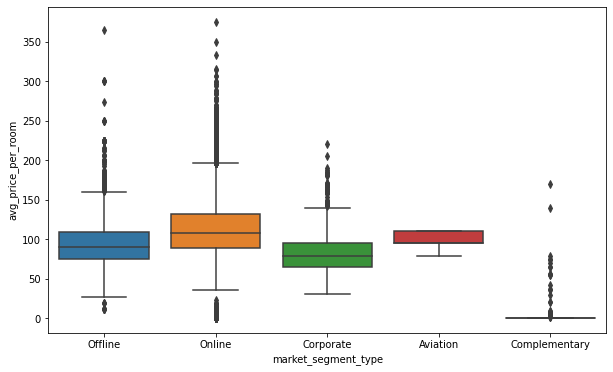

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="market_segment_type", y="avg_price_per_room")
plt.show()

* **Rooms booked online have the highest variations in prices.**
* The distribution for offline and corporate room prices are almost similar except for some outliers.
* Complementary market segment gets the rooms at very low prices, which makes sense.

**Let's see how booking status varies across different market segments. Also, how lead time impacts booking status**

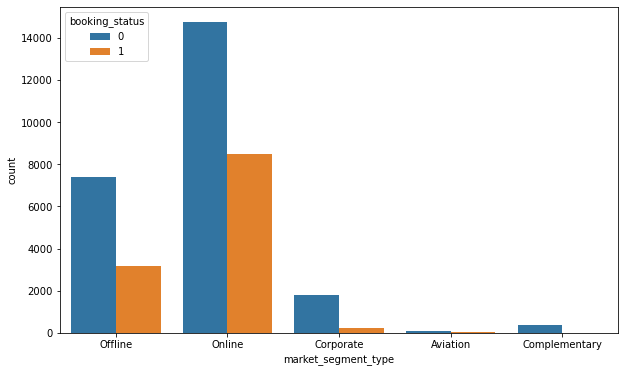

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='market_segment_type', hue='booking_status', data=data)
plt.show()

* **Online bookings have the highest number of cancellations.**
* Bookings made offline are less prone to cancellations.
* Corporate and complementary segment shows very low cancellations.

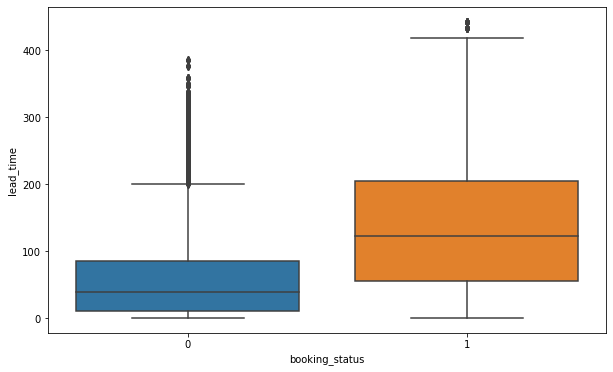

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="booking_status", y="lead_time")
plt.show()

* There's a big difference in the median value of lead time for bookings that were canceled and bookings that were not canceled. **The higher the lead time higher is the chances of a booking being canceled.**

**Now, let's check how the arrival month impacts the booking status**

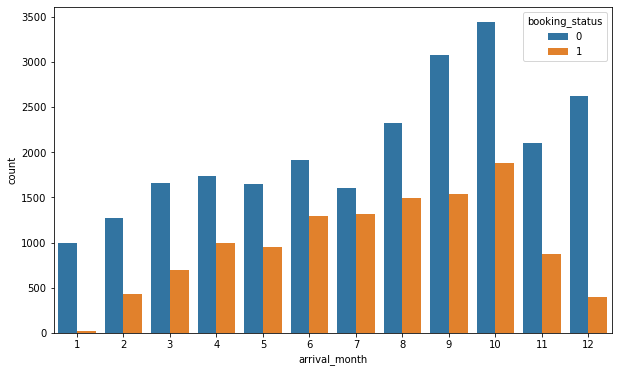

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='arrival_month', hue='booking_status', data=data)
plt.show()

- We observed earlier that the month of October has the highest number of bookings but the above plot shows that **October has the highest number of cancellations** as well.
- Bookings made for **December and January are less prone to cancellations**.

**Repeating guests are the guests who stay in the hotel often and are important to brand equity. Let's see what percentage of repeating guests cancel?**

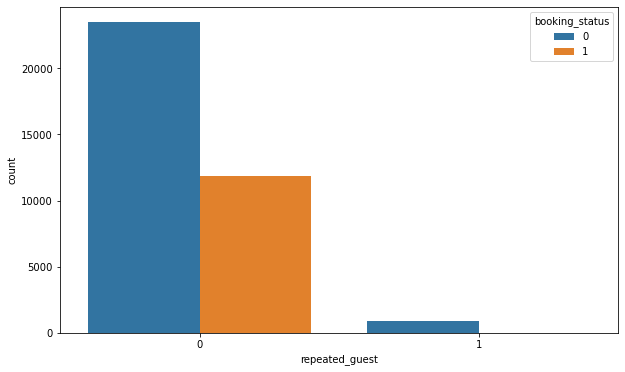

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='repeated_guest', hue='booking_status', data=data)
plt.show()

* There are **very few repeat customers but the cancellation among them is very less**. This is a good indication as repeat customers are important for the hospitality industry as they can help in spreading the word of mouth.

**We have explored different combinations of variables. Now, let's see the pairwise correlations between all the variables.**

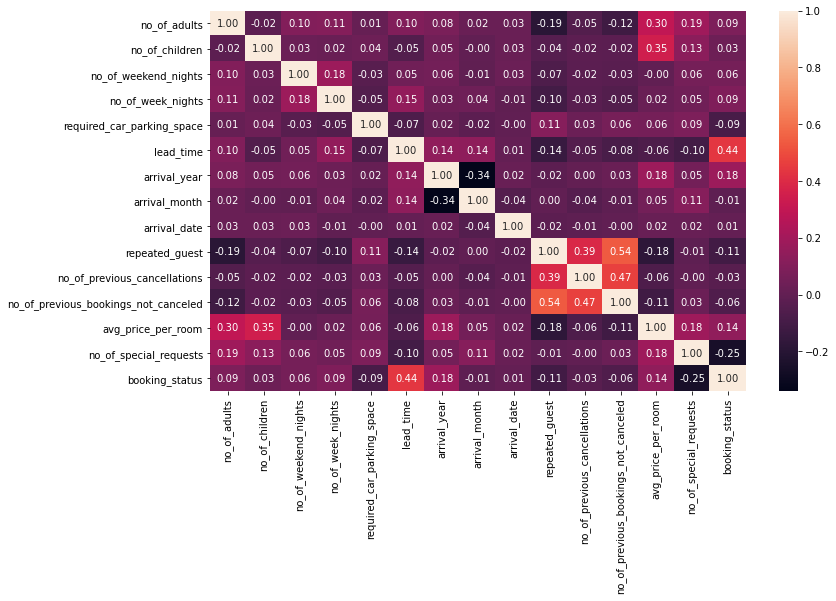

In [25]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

* There's a **positive correlation between the number of customers (adults and children) and the average price per room**. This makes sense as more the number of customers more rooms they will require thus increasing the cost.
* There's a **negative correlation between average room price and repeated guests**. The hotel might be giving some loyalty benefits to the customers.
* **Repeated guests have a positive correlation with the number of previous bookings canceled and previous bookings not canceled.** This implies that repeated customers are also likely to cancel their bookings.  
* There's a positive correlation between lead time and the number of weeknights a customer is planning to stay in the hotel.
* There's a **positive correlation between booking status and lead time**, indicating higher the lead time higher are the chances of cancellation.
* There's a negative correlation between the number of special requests from the customer and the booking status, indicating **if a customer has made some special requests the chances of cancellation might decrease**

**Now that we have explored our data, let's prepare it for modeling.**

## Preparing data for modeling

- Models cannot take non-numeric inputs. So, we will first create dummy variables for all the categorical variables.
- We will then split the data into train and test sets.

#### Question 3: 

- **Drop the target variable from the original data and store it in a separate dataframe `X` (1 Mark)**
- **Store the target variable in a separate series `Y` (1 Mark)**

In [57]:
#Remove the blanks and complete the below code
X=data.drop(columns = ['booking_status'])
Y=data.booking_status

In [58]:
#Creating dummy variables 
#drop_first=True is used to avoid redundant variables
X = pd.get_dummies(X, drop_first=True)

In [59]:
#Splitting the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=0.30, random_state=1)

## Building Classification Models

**Before training the model, let's choose the appropriate model evaluation criterion as per the problem on hand.**

### Model evaluation criterion

#### Model can make wrong predictions as:

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking. 

#### Which case is more important? 
* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of unsold rooms. The hotel might also have to bear an additional cost of advertising the room again on different distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity. 


#### How to reduce the losses?

* Hotel would want `F1 Score` to be maximized, greater the F1 score higher are the chances of minimizing False Negatives and False Positives. 

**Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [60]:
#function to print classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### Logistic Regression

#### Question 4: Fit the logistic regression model on the train dataset using random_state=1 (2 Marks)

In [61]:
#define logistic regression model
#fit the model
log_reg= LogisticRegression(random_state=1)

#fit the model

log_reg.fit(X_train,y_train)

LogisticRegression(random_state=1)

**Let's check the coefficient of each dependent variable in the data**

#### Question 5: Write your observations on the below coefficients obtained from the logistic regression model (3 Marks)

In [62]:
pd.Series(log_reg.coef_[0], index=X_train.columns).sort_values(ascending=False)

market_segment_type_Online              0.624292
type_of_meal_plan_Not Selected          0.321734
no_of_weekend_nights                    0.182352
avg_price_per_room                      0.020060
lead_time                               0.015686
no_of_adults                            0.011200
no_of_week_nights                       0.009509
arrival_date                            0.002628
type_of_meal_plan_Meal Plan 3           0.000400
room_type_reserved_Room_Type 3          0.000341
arrival_year                           -0.001746
room_type_reserved_Room_Type 2         -0.004274
market_segment_type_Complementary      -0.008791
room_type_reserved_Room_Type 5         -0.011109
room_type_reserved_Room_Type 7         -0.017817
no_of_previous_cancellations           -0.024744
market_segment_type_Corporate          -0.031296
room_type_reserved_Room_Type 4         -0.032683
repeated_guest                         -0.043467
room_type_reserved_Room_Type 6         -0.045560
no_of_children      

**Observations:** (note * these are log odds to match the best of outcome variables) successful booking = not cancelled)

- coefficients are positive for (market_segment_type_Online), (type_of_meal_plan_Not Selected), (no_of_weekend_nights) , (avg_price_per_room), (lead_time), (no_of_adults), (no_of_week_nights), (arrival_date), (Meal_plan_3), and (room_type_reserved_Room_Type 3). These all have a positive effect on the probability of the booking not being cancelled.
- not being able to match the needs of special requests can decrease the log odds of successfull booking by ~ -1.6 times.
- the more number of previous bookings a guest had cancelled in the past can decrease the success of the current booking by about -0.6X
- when guests don't choose a meal plan it is ~ 0.3x more likely there will be a successful booking where the guest doesnt cancel.
- when guests book weekend nights it is ~ 0.2 times more likely they will not cancel their booking. Makes sense because weekends are easier to plan ahead of time!

#### Question 6: Write your interpretations of the odds calculated from the logistic regression model coefficients (3 Marks)

In [34]:
odds = np.exp(log_reg.coef_[0]) #finding the odds

# adding the odds to a dataframe and sorting the values
pd.DataFrame(odds, X_train.columns, columns=['odds']).sort_values(by='odds', ascending=False) 

,odds
market_segment_type_Online,1.866924
type_of_meal_plan_Not Selected,1.379517
no_of_weekend_nights,1.200037
avg_price_per_room,1.020263
lead_time,1.015810
no_of_adults,1.011263
no_of_week_nights,1.009554
arrival_date,1.002632
type_of_meal_plan_Meal Plan 3,1.000400
room_type_reserved_Room_Type 3,1.000341


**Observations:**
Odds are defined as the ratio of the probability of success and the probability of failure.
Odds > 1 means greater odds of association with the exposure and success outcome. e.g. 1.40 = 40% increase in odds of outcome
Odds < 1 means there is a lower odds of association between the exposure and failure outcome. e.g.0.20 = 80% decrease in odds

- ~ 87% **increase** in odds of a booking being cancelled if it was donethrough online segment 
- ~ 38% **increase** in odds of a booking being cancelled if there was no meal plan selected initially
- ~ 20% **increase** in odds of a booking being cancelled if it lands on a weekend night.
- ~ 80% **decrease** in odds of a booking being cancelled if multiple special requests are not met. 
- ~ 19% **decrease** in odds of a booking being cancelled if previous bookings werent cancelled. 
- ~ 6% **decrease** in odds of a booking being cancelled if it was done on a popular month
- ~ 9% **decrease** in odds of a booking being cancelled if meal plan 2 was selected

**Now, let's check the performance of the model on the training set**

#### Question 7: Check the performance on the training data and write your observations from the classification report and confusion matrix for the training set (3 Marks)

              precision    recall  f1-score   support

           0       0.82      0.89      0.86     17029
           1       0.74      0.61      0.67      8363

    accuracy                           0.80     25392
   macro avg       0.78      0.75      0.76     25392
weighted avg       0.80      0.80      0.80     25392



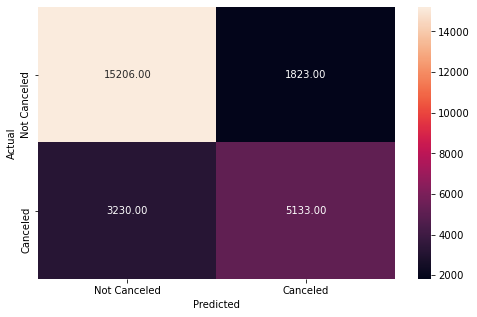

In [35]:
# Checking performance on the training data
y_pred_train = log_reg.predict(X_train)
metrics_score(y_train, y_pred_train)

**Reading confusion matrix (clockwise):**

- **True Positive**: Predicting the customer will not cancel the booking and the customer does not cancel the booking
- **False Negative**: Predicting the customer will cancel the booking but the customer does not cancel the booking
- **True Negative**: Predicting the customer will cancel the booking and the customer cancels the booking
- **False Positive**: Predicting the customer will not cancel the booking but the customer cancels the booking

**Observations:**

- 74% precision in predicitng booking cancellation
- 82% precision in predicting successfull booking
- The model is giving a decent average recall. A recall of ~0.75 suggests that there is a 25% (1 - 0.75) chance that the model will predict that a person is going to cancel their booking even tho they wont, and the hotel would waste revenue by hiring more workers, et.

**Precision-Recall Curve for Logistic Regression**

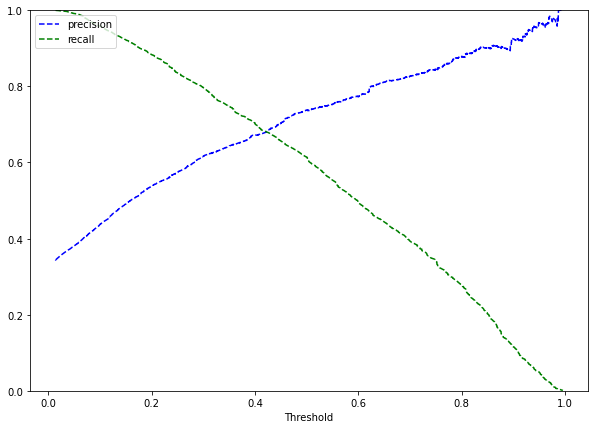

In [51]:
y_scores=log_reg.predict_proba(X_train) #predict_proba gives the probability of each observation belonging to each class


precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores[:,1])

#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

**Observations:**
- We can see that **precision and recall are balanced for the threshold of about 0.4.**
- Let's try to calculate the exact threshold where precision and recall are equal.

In [56]:
#calculating the exact threshold where precision and recall are equal.

for i in np.arange(len(thresholds)):
    if precisions[i]==recalls[i]:
        print(thresholds[i])
        

- The threshold of 0.42 would give a balanced precision and recall.

#### Question 8: Compare the performance of the model on training and testing sets after changing the threshold (2 Marks)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84     17029
           1       0.68      0.68      0.68      8363

    accuracy                           0.79     25392
   macro avg       0.76      0.76      0.76     25392
weighted avg       0.79      0.79      0.79     25392



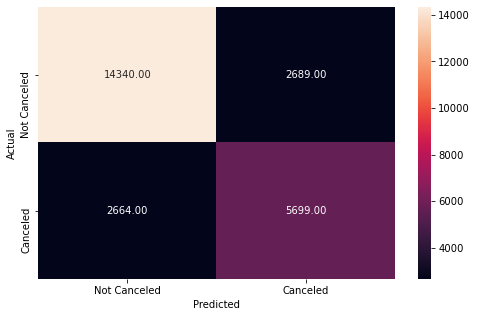

In [63]:
optimal_threshold1 = 0.42
metrics_score(y_train, y_scores[:,1]>optimal_threshold1)

**Let's check the performance of the model on the test data**

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      7361
           1       0.68      0.68      0.68      3522

    accuracy                           0.79     10883
   macro avg       0.76      0.76      0.76     10883
weighted avg       0.79      0.79      0.79     10883



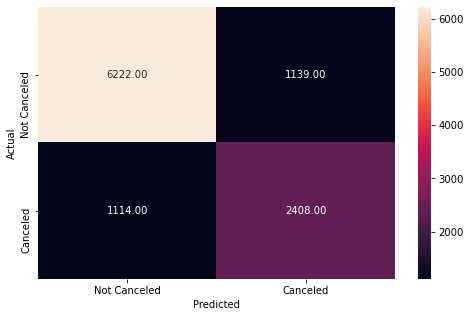

In [64]:
#Checking performance on the testing data
y_pred_test = log_reg.predict_proba(X_test)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold1)

**Observations:** 1-cancelled 0-not cancelled
- model is giving smilar performance on test and train data, meaning the model has generalized well
- 68% accuracy of booking cancellation for both data
- recal stayed the same for both test and train data
- from the results we can see low value in both models in the bottom right. So model wasn't able to predict cancel too well when guests actually ended up cancelling.
- predicte not cancel and actual not cancel is good value

### K - Nearest Neighbors (KNN)

- KNN is a distance based algorithm and all distance based algorithms are affected by the scale of the data.
- We will scale the attributes (dataframe X defined above) before building the KNN model.
- Then We need to identify the value of K to be used in KNN. We will use **GridSearchCV** to find the optimal value of K along with other hyperparameters.

In [68]:
# scaling the data
scaler=StandardScaler()
X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)  #fit_transform the training data
X_test_scaled=pd.DataFrame(scaler.transform(X_test), columns=X_test.columns) #transform the testing data

### Using GridSearchCV for find the value of K and hyperparameter tuning

**Points to note:**

* Hyperparameter tuning is tricky in the sense that there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model, so we usually resort to experimentation.
* **Grid search** is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* Grid search is an exhaustive search of values that tries many iterations to compute the optimum values of hyperparameters. So, **it might take up to 30 minutes for the code to run depending on the number of values and hyperparameters passed.**  
* The hyperparameters that we are tuning are:

    - **n_neighbors**: Number of neighbors to use.

    - **weights={'uniform', 'distance'}**
        - uniform : uniform weights. All points in each neighborhood are weighted equally.
        - distance : weight points by the inverse of their distance. In this case, closer neighbors of a query point will have a greater influence than neighbors that are further away.

    - **p**: When p = 1, this is equivalent to using Manhattan_distance (L1), and Euclidean_distance (L2) is used for p = 2.

In [69]:
knn = KNeighborsClassifier()

params_knn = {'n_neighbors':np.arange(2,20,2), 'weights':['uniform','distance'], 'p':[1,2]}

grid_knn = GridSearchCV(estimator=knn, param_grid=params_knn, scoring='f1', cv=10)

model_knn=grid_knn.fit(X_train_scaled,y_train)

knn_estimator = model_knn.best_estimator_
print(knn_estimator)

KNeighborsClassifier(n_neighbors=14, p=1, weights='distance')


#### Question 9: 

- **Fit the KNN model on the scaled training data using the optimal values of hyperparameters obtained from GridSearchCV (1 mark)**
- **Check the performance of the model on the scaled training and testing sets (2 Marks)**
- **Compare the performance and write your observations (1 Marks)**

In [71]:
#Fit the KNN model on the scaled training data

knn = KNeighborsClassifier(n_neighbors = 14, p=1, weights='distance')
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=14, p=1, weights='distance')

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17029
           1       1.00      0.99      0.99      8363

    accuracy                           0.99     25392
   macro avg       0.99      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392



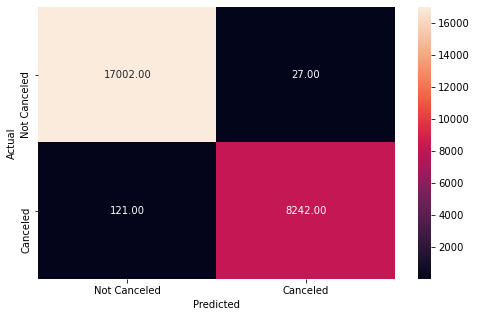

In [72]:
#Make predictions on the scaled training data and check the performance (using metrics_score function)

y_pred_train_knn = knn.predict(X_train_scaled)
metrics_score(y_train, y_pred_train_knn)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      7361
           1       0.82      0.78      0.80      3522

    accuracy                           0.87     10883
   macro avg       0.86      0.85      0.85     10883
weighted avg       0.87      0.87      0.87     10883



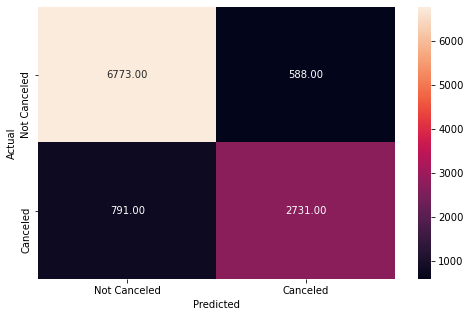

In [73]:
#Make predictions on the scaled testing data and check the performance (using metrics_score function)
y_pred_test = y_pred_test_knn = knn.predict(X_test_scaled)
metrics_score(y_test, y_pred_test_knn)

**Observations:**
- almost 100% accuracy on precision and recall for the training data.  F-score is ~1.0, indicating perfect precision and recall
- 82% percision in prediciting cancellation with the test data. 90% precision in predicting ''non cancellation''
- the scaled training data predicted better classifications (precision) then the scaled test data
- scaled training data has very low false positive and false negative values. Top right and bottom left.

#### Question 10: Write the conclusion on the key factors that are driving the approval of loan and write your recommendations to the business on how can they minimize the number of cancellations. (5 Marks)

*Not sure about what it means by driving approval of the loan? Original Objective:Build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.*

### Conclusion:

- KNN classifier on training data set has the best precision and recal.
- almost 100% accuracy on precision and recall for the training data. F-score is ~1.0, indicating perfect precision and recall
- Summer months have an average total % of more arrivals
- mostly couples are booking reservations
- more people who dont cancel dont choose a meal plan
- most guests are first time comers, as they havent cancelled before.
- meeting the needs of speial requests leads to more chance of a successfull booking.

### Recommendations:

- focus on customer satisfaction and matching special requests.
- target popular time periods such as summer and Christmas/New years as more people make reservations for holidays and are less likely to cancel.
- update their online website for better showcase of rooms and their features.
- higher the lead time higher are the chances of cancellation.
- target families more, as there are very less children guests. More guests = more rooms= more cost.
- offer good deals with repeating customers so they don't cancel and prefer to come back